Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 202, 256, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 101, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 101, 128, 32)      9248      
                                                                 
 up_sampling2d_3 (UpSampling  (None, 202, 256, 32)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 202, 256, 1)       289       
                                                                 
Total params: 10,433
Trainable params: 10,433
Non-trai

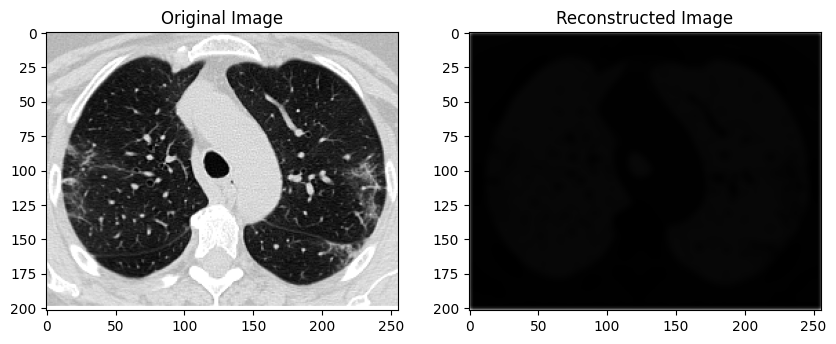

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load your CT scan image (replace 'your_image.png' with the actual file path)
image_path = r"C:\Users\MAHESH\Desktop\NIT CALICUT INTERNSHIP\Dataset 3\covid\Covid (1).png"
ct_image = plt.imread(image_path)

# Normalize pixel values to between 0 and 1
ct_image = ct_image / 255.0

# Add a batch dimension to the image
ct_image = np.expand_dims(ct_image, axis=0)

# Define the encoder-decoder architecture
input_shape = ct_image.shape[1:]

model = models.Sequential()

# Encoder
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

# Decoder
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model summary
model.summary()

# Train the model (you may need more complex models and larger datasets)
model.fit(ct_image, ct_image, epochs=50, batch_size=1)

# Use the trained model to compress and decompress the image
compressed_image = model.predict(ct_image)

# Display the original and reconstructed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(ct_image[0, :, :, 0], cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Reconstructed Image')
plt.imshow(compressed_image[0, :, :, 0], cmap='gray')

plt.show()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 202, 256, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 101, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 101, 128, 1)       289       
                                                                 
 up_sampling2d_6 (UpSampling  (None, 202, 256, 1)      0         
 2D)                                                             
                                                                 
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 0

Epoch 90/100
1/1 [==============================] - 0s 50ms/step - loss: 0.2318
Epoch 91/100
1/1 [==============================] - 0s 47ms/step - loss: 0.2265
Epoch 92/100
1/1 [==============================] - 0s 43ms/step - loss: 0.2214
Epoch 93/100
1/1 [==============================] - 0s 48ms/step - loss: 0.2163
Epoch 94/100
1/1 [==============================] - 0s 47ms/step - loss: 0.2114
Epoch 95/100
1/1 [==============================] - 0s 55ms/step - loss: 0.2066
Epoch 96/100
1/1 [==============================] - 0s 54ms/step - loss: 0.2018
Epoch 97/100
1/1 [==============================] - 0s 59ms/step - loss: 0.1972
Epoch 98/100
1/1 [==============================] - 0s 56ms/step - loss: 0.1927
Epoch 99/100
1/1 [==============================] - 0s 64ms/step - loss: 0.1883
Epoch 100/100
1/1 [==============================] - 0s 52ms/step


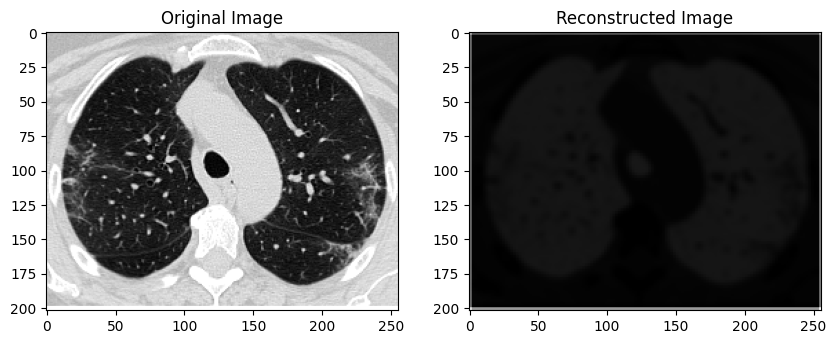

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load your CT scan image (replace 'your_image.png' with the actual file path)
image_path = r"C:\Users\MAHESH\Desktop\NIT CALICUT INTERNSHIP\Dataset 3\covid\Covid (1).png"
ct_image = plt.imread(image_path)

# Normalize pixel values to between 0 and 1
ct_image = ct_image / 255.0

# Add a batch dimension to the image
ct_image = np.expand_dims(ct_image, axis=0)

# Define the encoder-decoder architecture
input_shape = ct_image.shape[1:]

model = models.Sequential()

# Encoder
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

# Decoder
model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))
model.add(layers.UpSampling2D((2, 2)))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')  # Use binary crossentropy for image data

# Display the model summary
model.summary()

# Train the model (you may need more complex models and larger datasets)
model.fit(ct_image, ct_image, epochs=100, batch_size=1)

# Use the trained model to compress and decompress the image
compressed_image = model.predict(ct_image)

# Display the original and reconstructed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(ct_image[0, :, :, 0], cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Reconstructed Image')
plt.imshow(compressed_image[0, :, :, 0], cmap='gray')

plt.show()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_18 (Conv2D)          (None, 256, 256, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 64)     256   

C:\Users\MAHESH\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 110ms/step


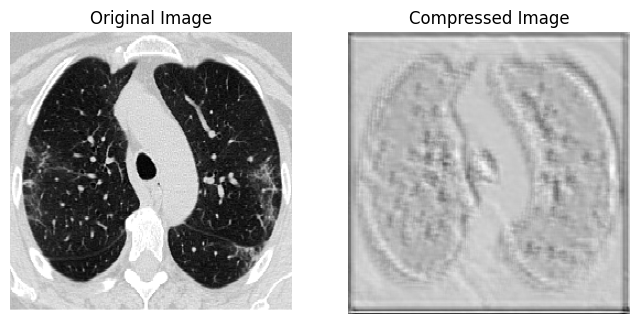

In [11]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess a sample CT scan image
image_path = r"C:\Users\MAHESH\Desktop\NIT CALICUT INTERNSHIP\Dataset 3\covid\Covid (1).png"  # Replace with the actual path to your image
img = load_img(image_path, grayscale=True, target_size=(256, 256))
img_array = img_to_array(img) / 255.0  # Normalize pixel values

# Expand dimensions to match the input shape expected by the model
img_array = np.expand_dims(img_array, axis=0)

# Define the input shape based on your CT scan image dimensions
input_shape = (256, 256, 1)

# Encoder
inputs = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Create and compile the model
autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')  # Use 'binary_crossentropy' for single-channel images

autoencoder.summary()

# Train the autoencoder (you need to have a dataset for training)
# autoencoder.fit(training_data, training_data, epochs=epochs, batch_size=batch_size, validation_data=(validation_data, validation_data))

# Generate compressed images
compressed_images = autoencoder.predict(img_array)

# Display the original and compressed images
plt.figure(figsize=(8, 4))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img_array[0, :, :, 0], cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Compressed Image
plt.subplot(1, 2, 2)
plt.imshow(compressed_images[0, :, :, 0], cmap='gray')
plt.title('Compressed Image')
plt.axis('off')

plt.show()


In [5]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError, PeakSignalToNoiseRatio, StructuralSimilarityIndex
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess a sample CT scan image
image_path = r"C:\Users\MAHESH\Desktop\NIT CALICUT INTERNSHIP\Dataset 3\covid\Covid (1).png"  # Replace with the actual path to your image
img = load_img(image_path, grayscale=True, target_size=(256, 256))
img_array = img_to_array(img) / 255.0  # Normalize pixel values

# Expand dimensions to match the input shape expected by the model
img_array = np.expand_dims(img_array, axis=0)

# Define the input shape based on your CT scan image dimensions
input_shape = (256, 256, 1)

# Encoder
inputs = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Create and compile the model
autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')  # Use 'binary_crossentropy' for single-channel images

autoencoder.summary()

# Train the autoencoder (you need to have a dataset for training)
# autoencoder.fit(training_data, training_data, epochs=epochs, batch_size=batch_size, validation_data=(validation_data, validation_data))

# Generate compressed images
compressed_images = autoencoder.predict(img_array)

# Evaluate the model using standard quality check metrics
mse = MeanSquaredError()(img_array, compressed_images).numpy()
mae = MeanAbsoluteError()(img_array, compressed_images).numpy()
psnr = PeakSignalToNoiseRatio()(img_array, compressed_images).numpy()
ssim = StructuralSimilarityIndex()(img_array, compressed_images).numpy()

# Display the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Peak Signal-to-Noise Ratio (PSNR): {psnr}")
print(f"Structural Similarity Index (SSIM): {ssim}")

# Display the original and compressed images
plt.figure(figsize=(8, 4))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img_array[0, :, :, 0], cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Compressed Image
plt.subplot(1, 2, 2)
plt.imshow(compressed_images[0, :, :, 0], cmap='gray')
plt.title('Compressed Image')
plt.axis('off')

plt.show()

ImportError: cannot import name 'PeakSignalToNoiseRatio' from 'tensorflow.keras.metrics' (C:\Users\MAHESH\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\api\_v2\keras\metrics\__init__.py)

In [7]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

# Load and preprocess a sample CT scan image
image_path = r"C:\Users\MAHESH\Desktop\NIT CALICUT INTERNSHIP\Dataset 3\covid\Covid (1).png"  # Replace with the actual path to your image
img = load_img(image_path, color_mode='grayscale', target_size=(256, 256))
img_array = img_to_array(img) / 255.0  # Normalize pixel values

# Expand dimensions to match the input shape expected by the model
img_array = np.expand_dims(img_array, axis=0)

# Define the input shape based on your CT scan image dimensions
input_shape = (256, 256, 1)

# Encoder
inputs = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Create and compile the model
autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')  # Use 'binary_crossentropy' for single-channel images

autoencoder.summary()

# Train the autoencoder (you need to have a dataset for training)
# autoencoder.fit(training_data, training_data, epochs=epochs, batch_size=batch_size, validation_data=(validation_data, validation_data))

# Generate compressed images
compressed_images = autoencoder.predict(img_array)

# Evaluate the model using scikit-image metrics
psnr_value = psnr(img_array[0, :, :, 0], compressed_images[0, :, :, 0])
ssim_value = ssim(img_array[0, :, :, 0], compressed_images[0, :, :, 0])

# Display the evaluation metrics
print(f"Peak Signal-to-Noise Ratio (PSNR): {psnr_value}")
print(f"Structural Similarity Index (SSIM): {ssim_value}")

# Display the original and compressed images
plt.figure(figsize=(8, 4))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img_array[0, :, :, 0], cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Compressed Image
plt.subplot(1, 2, 2)
plt.imshow(compressed_images[0, :, :, 0], cmap='gray')
plt.title('Compressed Image')
plt.axis('off')

plt.show()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 64)     256   

ValueError: Since image dtype is floating point, you must specify the data_range parameter. Please read the documentation carefully (including the note). It is recommended that you always specify the data_range anyway.

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 256, 256, 32)      320       
                                                                 
 batch_normalization_4 (Batc  (None, 256, 256, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_5 (Batc  (None, 128, 128, 64)     256 

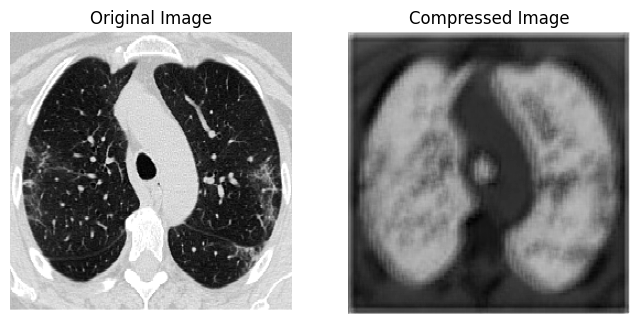

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = r"C:\Users\MAHESH\Desktop\NIT CALICUT INTERNSHIP\Dataset 3\covid\Covid (1).png"  # Replace with the actual path to your image
img = load_img(image_path, color_mode='grayscale', target_size=(256, 256))
img_array = img_to_array(img) / 255.0  # Normalized pixel values


img_array = np.expand_dims(img_array, axis=0)

input_shape = (256, 256, 1)

# Encoder
inputs = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Created and compiled the model
autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')  # Use 'binary_crossentropy' for single-channel images

autoencoder.summary()


# Generateing compressed images
compressed_images = autoencoder.predict(img_array)

# Defined PSNR and SSIM functions
def psnr(y_true, y_pred):
    return tf.image.psnr(y_true, y_pred, max_val=1.0)

def ssim(y_true, y_pred):
    return tf.image.ssim(y_true, y_pred, max_val=1.0)

# Evaluating the model using TensorFlow metrics
psnr_value = psnr(img_array, compressed_images)
ssim_value = ssim(img_array, compressed_images)

# Displayed the evaluation metrics
print(f"Peak Signal-to-Noise Ratio (PSNR): {psnr_value.numpy()}")
print(f"Structural Similarity Index (SSIM): {ssim_value.numpy()}")

# Displayed the original and compressed images
plt.figure(figsize=(8, 4))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img_array[0, :, :, 0], cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Compressed Image
plt.subplot(1, 2, 2)
plt.imshow(compressed_images[0, :, :, 0], cmap='gray')
plt.title('Compressed Image')
plt.axis('off')

plt.show()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_70 (Conv2D)          (None, 256, 256, 32)      320       
                                                                 
 batch_normalization_56 (Bat  (None, 256, 256, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_71 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_57 (Bat  (None, 128, 128, 64)     256

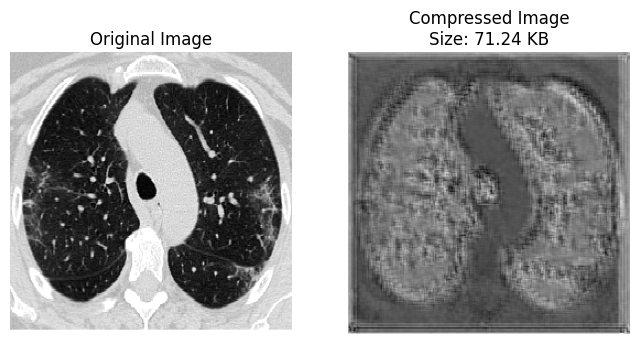

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import os

image_path = r"C:\Users\MAHESH\Desktop\NIT CALICUT INTERNSHIP\Dataset 3\covid\Covid (1).png"  # Replace with the actual path to your image
img = load_img(image_path, color_mode='grayscale', target_size=(256, 256))
img_array = img_to_array(img) / 255.0  # Normalized pixel values

img_array = np.expand_dims(img_array, axis=0)

input_shape = (256, 256, 1)

# Encoder
inputs = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Created and compiled the model
autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')  # Use 'binary_crossentropy' for single-channel images

autoencoder.summary()

# Generating compressed images
compressed_images = autoencoder.predict(img_array)

# Define the path to save the compressed image
compressed_image_path = 'path_to_save_compressed_image.png'
plt.imsave(compressed_image_path, compressed_images[0, :, :, 0], cmap='gray')

# Get the file size of the compressed image
compressed_image_size_kb = os.path.getsize(compressed_image_path) / 1024.0

# Defined PSNR and SSIM functions
def psnr(y_true, y_pred):
    return tf.image.psnr(y_true, y_pred, max_val=1.0)

def ssim(y_true, y_pred):
    return tf.image.ssim(y_true, y_pred, max_val=1.0)

# Evaluating the model using TensorFlow metrics
psnr_value = psnr(img_array, compressed_images)
ssim_value = ssim(img_array, compressed_images)

# Display the evaluation metrics
print(f"Peak Signal-to-Noise Ratio (PSNR): {psnr_value.numpy()}")
print(f"Structural Similarity Index (SSIM): {ssim_value.numpy()}")
print(f"Compressed Image Size: {compressed_image_size_kb:.2f} KB")

# Display the original and compressed images
plt.figure(figsize=(8, 4))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img_array[0, :, :, 0], cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Compressed Image
plt.subplot(1, 2, 2)
plt.imshow(compressed_images[0, :, :, 0], cmap='gray')
plt.title(f'Compressed Image\nSize: {compressed_image_size_kb:.2f} KB')
plt.axis('off')

plt.show()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_95 (Conv2D)          (None, 256, 256, 64)      320       
                                                                 
 batch_normalization_76 (Bat  (None, 256, 256, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 128, 128, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_96 (Conv2D)          (None, 128, 128, 128)     32896     
                                                                 
 batch_normalization_77 (Bat  (None, 128, 128, 128)    512

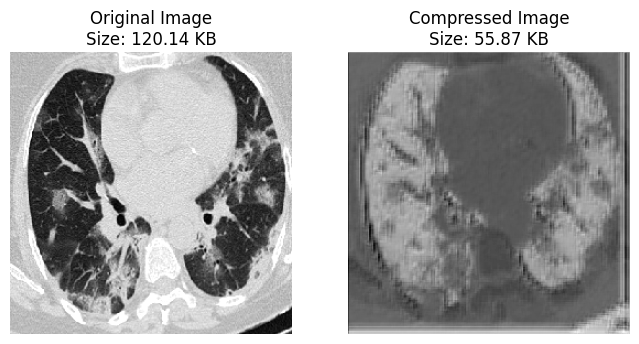

In [26]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import os

image_path = r"C:\Users\MAHESH\Desktop\NIT CALICUT INTERNSHIP\Dataset 3\covid\Covid (5).png" # Replace with the actual path to your image
img = load_img(image_path, color_mode='grayscale', target_size=(256, 256))
img_array = img_to_array(img) / 255.0  # Normalized pixel values

img_array = np.expand_dims(img_array, axis=0)

input_shape = (256, 256, 1)

# Encoder
inputs = Input(shape=input_shape)
x = Conv2D(64, (2, 2), activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(128, (2, 2), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(128, (2, 2), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(64, (2, 2), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Created and compiled the model
autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')  # Use 'binary_crossentropy' for single-channel images

autoencoder.summary()

# Generating compressed images
compressed_images = autoencoder.predict(img_array)

# Define the path to save the compressed image
compressed_image_path = 'path_to_save_compressed_image.png'
plt.imsave(compressed_image_path, compressed_images[0, :, :, 0], cmap='gray')

# Get the file size of the compressed image
compressed_image_size_kb = os.path.getsize(compressed_image_path) / 1024.0

# Get the file size of the original image
original_image_size_kb = os.path.getsize(image_path) / 1024.0

# Defined PSNR and SSIM functions
def psnr(y_true, y_pred):
    return tf.image.psnr(y_true, y_pred, max_val=1.0)

def ssim(y_true, y_pred):
    return tf.image.ssim(y_true, y_pred, max_val=1.0)

# Evaluating the model using TensorFlow metrics
psnr_value = psnr(img_array, compressed_images)
ssim_value = ssim(img_array, compressed_images)

# Display the evaluation metrics and image sizes
print(f"Original Image Size: {original_image_size_kb:.2f} KB")
print(f"Compressed Image Size: {compressed_image_size_kb:.2f} KB")
print(f"Peak Signal-to-Noise Ratio (PSNR): {psnr_value.numpy()}")
print(f"Structural Similarity Index (SSIM): {ssim_value.numpy()}")

# Display the original and compressed images
plt.figure(figsize=(8, 4))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img_array[0, :, :, 0], cmap='gray')
plt.title(f'Original Image\nSize: {original_image_size_kb:.2f} KB')
plt.axis('off')

# Compressed Image
plt.subplot(1, 2, 2)
plt.imshow(compressed_images[0, :, :, 0], cmap='gray')
plt.title(f'Compressed Image\nSize: {compressed_image_size_kb:.2f} KB')
plt.axis('off')

plt.show()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      640       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 128)    512   

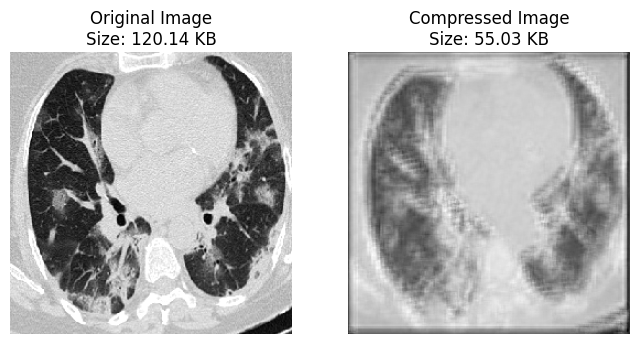

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the image
image_path = r"C:\Users\MAHESH\Desktop\NIT CALICUT INTERNSHIP\Dataset 3\covid\Covid (5).png"
img = load_img(image_path, color_mode='grayscale', target_size=(256, 256))
img_array = img_to_array(img) / 255.0  # Normalize pixel values

img_array = np.expand_dims(img_array, axis=0)

input_shape = (256, 256, 1)

# Encoder
inputs = Input(shape=input_shape)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Create and compile the model
autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')  # Use 'binary_crossentropy' for single-channel images

autoencoder.summary()

# Generate compressed images
compressed_images = autoencoder.predict(img_array)

# Define the path to save the compressed image
compressed_image_path = 'path_to_save_compressed_image.png'
plt.imsave(compressed_image_path, compressed_images[0, :, :, 0], cmap='gray')

# Get the file size of the compressed image
compressed_image_size_kb = os.path.getsize(compressed_image_path) / 1024.0

# Get the file size of the original image
original_image_size_kb = os.path.getsize(image_path) / 1024.0

# Define PSNR and SSIM functions
def psnr(y_true, y_pred):
    return tf.image.psnr(y_true, y_pred, max_val=1.0)

def ssim(y_true, y_pred):
    return tf.image.ssim(y_true, y_pred, max_val=1.0)

# Evaluate the model using TensorFlow metrics
psnr_value = psnr(img_array, compressed_images)
ssim_value = ssim(img_array, compressed_images)

# Display the evaluation metrics and image sizes
print(f"Original Image Size: {original_image_size_kb:.2f} KB")
print(f"Compressed Image Size: {compressed_image_size_kb:.2f} KB")
print(f"Peak Signal-to-Noise Ratio (PSNR): {psnr_value.numpy()}")
print(f"Structural Similarity Index (SSIM): {ssim_value.numpy()}")

# Display the original and compressed images
plt.figure(figsize=(8, 4))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img_array[0, :, :, 0], cmap='gray')
plt.title(f'Original Image\nSize: {original_image_size_kb:.2f} KB')
plt.axis('off')

# Compressed Image
plt.subplot(1, 2, 2)
plt.imshow(compressed_images[0, :, :, 0], cmap='gray')
plt.title(f'Compressed Image\nSize: {compressed_image_size_kb:.2f} KB')
plt.axis('off')

plt.show()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 256, 256, 64)      640       
                                                                 
 batch_normalization_4 (Batc  (None, 256, 256, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 batch_normalization_5 (Batc  (None, 128, 128, 128)    512 

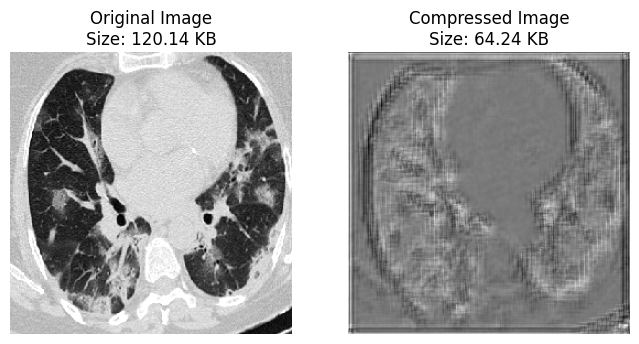

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the image
image_path = r"C:\Users\MAHESH\Desktop\NIT CALICUT INTERNSHIP\Dataset 3\covid\Covid (5).png"
img = load_img(image_path, color_mode='grayscale', target_size=(256, 256))
img_array = img_to_array(img) / 255.0  # Normalize pixel values

img_array = np.expand_dims(img_array, axis=0)

input_shape = (256, 256, 1)

# Encoder
inputs = Input(shape=input_shape)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Create and compile the model
autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')  # Use 'binary_crossentropy' for single-channel images

autoencoder.summary()

# Generate compressed images
compressed_images = autoencoder.predict(img_array)

# Define the path to save the compressed image
compressed_image_path = 'path_to_save_compressed_image.png'
plt.imsave(compressed_image_path, compressed_images[0, :, :, 0], cmap='gray')

# Get the file size of the compressed image
compressed_image_size_kb = os.path.getsize(compressed_image_path) / 1024.0

# Get the file size of the original image
original_image_size_kb = os.path.getsize(image_path) / 1024.0

# Evaluate the model using TensorFlow metrics
psnr_value = tf.image.psnr(img_array, compressed_images, max_val=1.0)

# Display the evaluation metrics and image sizes
print(f"Original Image Size: {original_image_size_kb:.2f} KB")
print(f"Compressed Image Size: {compressed_image_size_kb:.2f} KB")
print(f"Peak Signal-to-Noise Ratio (PSNR): {psnr_value.numpy()}")

# Display the original and compressed images
plt.figure(figsize=(8, 4))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img_array[0, :, :, 0], cmap='gray')
plt.title(f'Original Image\nSize: {original_image_size_kb:.2f} KB')
plt.axis('off')

# Compressed Image
plt.subplot(1, 2, 2)
plt.imshow(compressed_images[0, :, :, 0], cmap='gray')
plt.title(f'Compressed Image\nSize: {compressed_image_size_kb:.2f} KB')
plt.axis('off')

plt.show()

1/1 [==============================] - 0s 60ms/step


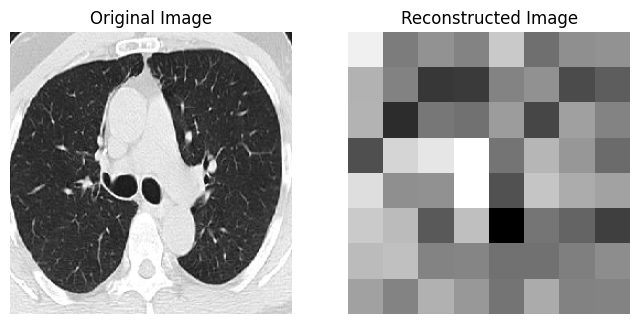

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess a sample CT scan image
image_path = r"C:\Users\MAHESH\Desktop\NIT CALICUT INTERNSHIP\Dataset 3\non_covid\Non-Covid (56).png"  # Replace with the actual path to your image
img = load_img(image_path, color_mode='grayscale', target_size=(256, 256))
img_array = img_to_array(img) / 255.0  # Normalize pixel values

# Expand dimensions to match the input shape expected by the model
img_array = np.expand_dims(img_array, axis=0)

input_shape = (256, 256, 1)

# Compression Module
inputs = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
compressed_output = Dense(64, activation='relu')(x)

compression_model = Model(inputs, compressed_output)

# Decompression Module
decoded_inputs = Input(shape=(64,))
x = Dense(8 * 8 * 1, activation='relu')(decoded_inputs)
x = Reshape((8, 8, 1))(x)
x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
decoded_output = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

decompression_model = Model(decoded_inputs, decoded_output)

# Example usage
compressed_data = compression_model.predict(img_array)
reconstructed_image = decompression_model.predict(compressed_data)

# Display the original and reconstructed images
plt.figure(figsize=(8, 4))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img_array[0, :, :, 0], cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Reconstructed Image
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image[0, :, :, 0], cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()


1/1 [==============================] - 0s 55ms/step


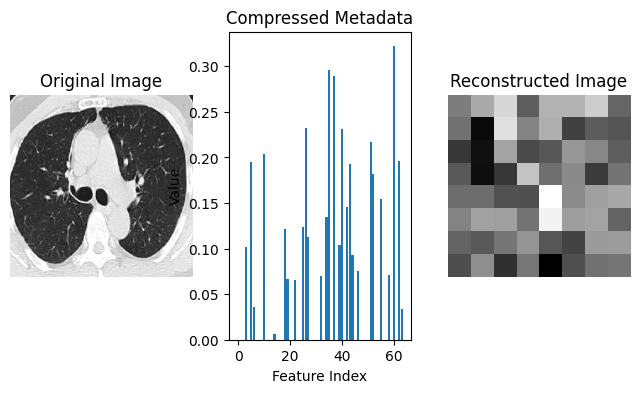

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess a sample CT scan image
image_path = r"C:\Users\MAHESH\Desktop\NIT CALICUT INTERNSHIP\Dataset 3\non_covid\Non-Covid (56).png"  # Replace with the actual path to your image
img = load_img(image_path, color_mode='grayscale', target_size=(256, 256))
img_array = img_to_array(img) / 255.0  # Normalize pixel values

# Expand dimensions to match the input shape expected by the model
img_array = np.expand_dims(img_array, axis=0)

input_shape = (256, 256, 1)

# Compression Module
inputs = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
compressed_output = Dense(64, activation='relu')(x)

compression_model = Model(inputs, compressed_output)

# Decompression Module
decoded_inputs = Input(shape=(64,))
x = Dense(8 * 8 * 1, activation='relu')(decoded_inputs)
x = Reshape((8, 8, 1))(x)
x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
decoded_output = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

decompression_model = Model(decoded_inputs, decoded_output)

# Example usage
compressed_data = compression_model.predict(img_array)
reconstructed_image = decompression_model.predict(compressed_data)

# Display the original and reconstructed images
plt.figure(figsize=(8, 4))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(img_array[0, :, :, 0], cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Compressed Metadata
plt.subplot(1, 3, 2)
plt.bar(range(len(compressed_data[0])), compressed_data[0])
plt.title('Compressed Metadata')
plt.xlabel('Feature Index')
plt.ylabel('Value')

# Reconstructed Image
plt.subplot(1, 3, 3)
plt.imshow(reconstructed_image[0, :, :, 0], cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 256, 256, 32)      320       
                                                                 
 batch_normalization_8 (Batc  (None, 256, 256, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_9 (Batc  (None, 128, 128, 64)     256 

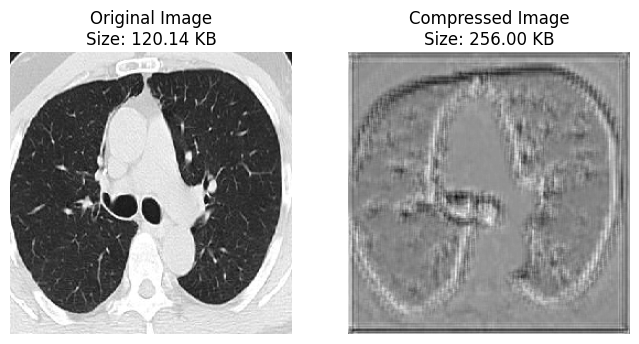

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import os

# Load and preprocess a sample CT scan image
image_path = r"C:\Users\MAHESH\Desktop\NIT CALICUT INTERNSHIP\Dataset 3\non_covid\Non-Covid (56).png" # Replace with the actual path to your image
img = load_img(image_path, color_mode='grayscale', target_size=(256, 256))
img_array = img_to_array(img) / 255.0  # Normalize pixel values

# Expand dimensions to match the input shape expected by the model
img_array = np.expand_dims(img_array, axis=0)

# Define the input shape based on your CT scan image dimensions
input_shape = (256, 256, 1)

# Encoder
inputs = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Create and compile the model
autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')  # Use 'binary_crossentropy' for single-channel images

autoencoder.summary()

# Train the autoencoder (you need to have a dataset for training)
# autoencoder.fit(training_data, training_data, epochs=epochs, batch_size=batch_size, validation_data=(validation_data, validation_data))

# Generate compressed images
compressed_images = autoencoder.predict(img_array)

# Serialize compressed metadata to a binary string and get its size
compressed_metadata_size_kb = len(compressed_images.tobytes()) / 1024.0

# Display the sizes along with the original and compressed images
print(f"Original Image Size: {original_image_size_kb:.2f} KB")
print(f"Compressed Metadata Size: {compressed_metadata_size_kb:.2f} KB")

# Display the original and compressed images
plt.figure(figsize=(8, 4))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img_array[0, :, :, 0], cmap='gray')
plt.title(f'Original Image\nSize: {original_image_size_kb:.2f} KB')
plt.axis('off')

# Compressed Image
plt.subplot(1, 2, 2)
plt.imshow(compressed_images[0, :, :, 0], cmap='gray')
plt.title(f'Compressed Image\nSize: {compressed_metadata_size_kb:.2f} KB')
plt.axis('off')

plt.show()

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_92 (Conv2D)          (None, 256, 256, 512)     5120      
                                                                 
 batch_normalization_72 (Bat  (None, 256, 256, 512)    2048      
 chNormalization)                                                
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 128, 128, 512)    0         
 g2D)                                                            
                                                                 
 conv2d_93 (Conv2D)          (None, 128, 128, 1024)    4719616   
                                                                 
 batch_normalization_73 (Bat  (None, 128, 128, 1024)   409

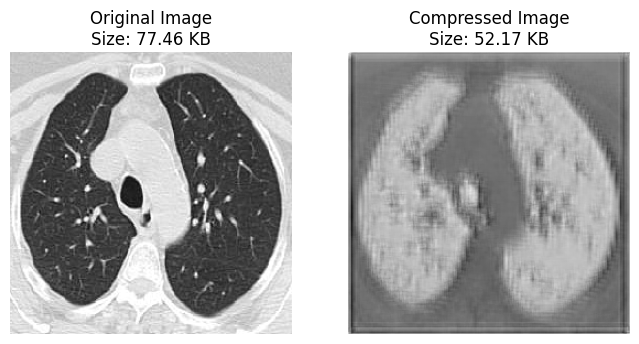

In [22]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the image
image_path = r"C:\Users\MAHESH\Desktop\NIT CALICUT INTERNSHIP\Dataset 3\non_covid\Non-Covid (68).png"
img = load_img(image_path, color_mode='grayscale', target_size=(256, 256))
img_array = img_to_array(img) / 255.0  # Normalize pixel values

img_array = np.expand_dims(img_array, axis=0)

input_shape = (256, 256, 1)

# Encoder
inputs = Input(shape=input_shape)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(1024, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(1024, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Create and compile the model
autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='mse')  # Use mean squared error for loss

autoencoder.summary()

# Train the autoencoder with your dataset
# autoencoder.fit(training_data, training_data, epochs=epochs, batch_size=batch_size, validation_data=(validation_data, validation_data))

# Generate compressed images
compressed_images = autoencoder.predict(img_array)

# Define the path to save the compressed image
compressed_image_path = 'path_to_save_compressed_image.png'
plt.imsave(compressed_image_path, compressed_images[0, :, :, 0], cmap='gray')

# Get the file size of the compressed image
compressed_image_size_kb = os.path.getsize(compressed_image_path) / 1024.0

# Get the file size of the original image
original_image_size_kb = os.path.getsize(image_path) / 1024.0

# Evaluate the model using TensorFlow metrics
psnr_value = tf.image.psnr(img_array, compressed_images, max_val=1.0)
ssim_value = tf.image.ssim(img_array, compressed_images, max_val=1.0)

# Display the evaluation metrics and image sizes
print(f"Original Image Size: {original_image_size_kb:.2f} KB")
print(f"Compressed Image Size: {compressed_image_size_kb:.2f} KB")
print(f"Peak Signal-to-Noise Ratio (PSNR): {psnr_value.numpy()}")
print(f"Structural Similarity Index (SSIM): {ssim_value.numpy()}")

# Display the original and compressed images
plt.figure(figsize=(8, 4))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img_array[0, :, :, 0], cmap='gray')
plt.title(f'Original Image\nSize: {original_image_size_kb:.2f} KB')
plt.axis('off')

# Compressed Image
plt.subplot(1, 2, 2)
plt.imshow(compressed_images[0, :, :, 0], cmap='gray')
plt.title(f'Compressed Image\nSize: {compressed_image_size_kb:.2f} KB')
plt.axis('off')

plt.show()


Epoch 1/10
63/63 [==============================] - 269s 4s/step - loss: 0.4941 - val_loss: 0.5950
Epoch 2/10
63/63 [==============================] - 261s 4s/step - loss: 0.4806 - val_loss: 0.5822
Epoch 3/10
63/63 [==============================] - 267s 4s/step - loss: 0.4785 - val_loss: 0.5700
Epoch 4/10
63/63 [==============================] - 263s 4s/step - loss: 0.4786 - val_loss: 0.5454
Epoch 5/10
63/63 [==============================] - 260s 4s/step - loss: 0.4809 - val_loss: 0.5282
Epoch 6/10
63/63 [==============================] - 254s 4s/step - loss: 0.4769 - val_loss: 0.4997
Epoch 7/10
63/63 [==============================] - 2699s 43s/step - loss: 0.4763 - val_loss: 0.4868
Epoch 8/10
63/63 [==============================] - 261s 4s/step - loss: 0.4759 - val_loss: 0.4807
Epoch 9/10
63/63 [==============================] - 269s 4s/step - loss: 0.4752 - val_loss: 0.4780
Epoch 10/10
8/8 [==============================] - 11s 1s/step


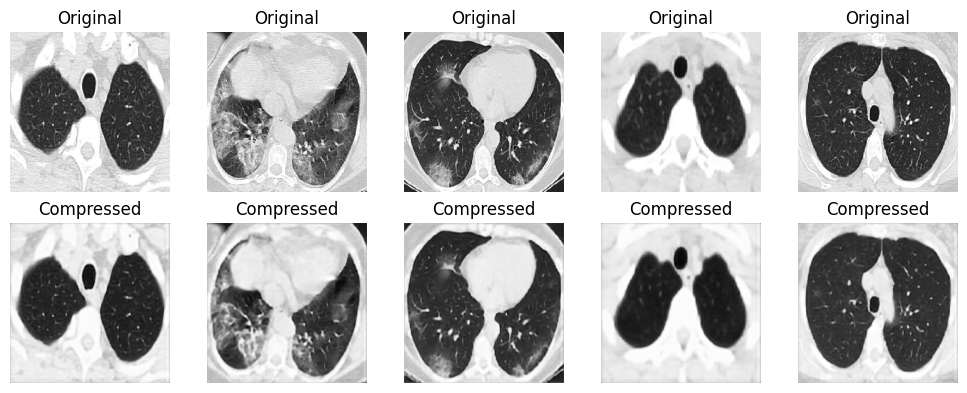

In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from sklearn.model_selection import train_test_split

# Set the path to the folder containing CT scan images
folder_path = r"C:\Users\MAHESH\Desktop\NIT CALICUT INTERNSHIP\Dataset 3\covid"
image_size = (256, 256)

# Load and preprocess CT scan images
def load_images(folder_path, image_size):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = load_img(img_path, color_mode='grayscale', target_size=image_size)
        img_array = img_to_array(img) / 255.0  # Normalize pixel values
        images.append(img_array)
    return np.array(images)

ct_images = load_images(folder_path, image_size)

# Split the data into training and testing sets
train_images, test_images = train_test_split(ct_images, test_size=0.2, random_state=42)

# Define the autoencoder model
def build_autoencoder(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(inputs, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder

# Build and train the autoencoder
input_shape = (image_size[0], image_size[1], 1)
autoencoder = build_autoencoder(input_shape)

# Expand dimensions for model input
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Train the autoencoder
autoencoder.fit(train_images, train_images, epochs=10, batch_size=16, validation_data=(test_images, test_images))

# Generate compressed images
compressed_images = autoencoder.predict(test_images)

# Display the original and compressed images
plt.figure(figsize=(10, 4))

# Original Images
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i, :, :, 0], cmap='gray')
    plt.title('Original')
    plt.axis('off')

# Compressed Images
for i in range(5):
    plt.subplot(2, 5, i + 6)
    plt.imshow(compressed_images[i, :, :, 0], cmap='gray')
    plt.title('Compressed')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

# Set the path to the folder containing CT scan images
folder_path = r"C:\Users\MAHESH\Desktop\NIT CALICUT INTERNSHIP\Dataset 3\covid"
image_size = (256, 256)

# Load and preprocess CT scan images
def load_images(folder_path, image_size):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = load_img(img_path, color_mode='grayscale', target_size=image_size)
        img_array = img_to_array(img) / 255.0  # Normalize pixel values
        images.append(img_array)
    return np.array(images)

ct_images = load_images(folder_path, image_size)

# Split the data into training and testing sets
train_images, test_images = train_test_split(ct_images, test_size=0.2, random_state=42)

# Define the autoencoder model
def build_autoencoder(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(inputs, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder

# Build and train the autoencoder
input_shape = (image_size[0], image_size[1], 1)
autoencoder = build_autoencoder(input_shape)

# Expand dimensions for model input
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Train the autoencoder
autoencoder.fit(train_images, train_images, epochs=10, batch_size=16, validation_data=(test_images, test_images))

# Generate compressed images
compressed_images = autoencoder.predict(test_images)

# Display the original and compressed images with file sizes
plt.figure(figsize=(10, 6))

for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i, :, :, 0], cmap='gray')
    plt.title('Original')
    plt.axis('off')
    plt.xlabel(f"Size: {os.path.getsize(os.path.join(folder_path, f'image_{i}.png')) / 1024.0:.2f} KB")

for i in range(5):
    plt.subplot(2, 5, i + 6)
    plt.imshow(compressed_images[i, :, :, 0], cmap='gray')
    plt.title('Compressed')
    plt.axis('off')
    plt.xlabel(f"Size: {os.path.getsize(os.path.join(folder_path, f'image_{i}.png')) / 1024.0:.2f} KB")

plt.tight_layout()
plt.show()


Epoch 1/10
63/63 [==============================] - 256s 4s/step - loss: 0.4960 - val_loss: 0.6094
Epoch 2/10
63/63 [==============================] - 291s 5s/step - loss: 0.4821 - val_loss: 0.6063
Epoch 3/10
63/63 [==============================] - 279s 4s/step - loss: 0.4794 - val_loss: 0.5683
Epoch 4/10
63/63 [==============================] - 271s 4s/step - loss: 0.4778 - val_loss: 0.5670
Epoch 5/10
63/63 [==============================] - 294s 5s/step - loss: 0.4774 - val_loss: 0.5269
Epoch 6/10
63/63 [==============================] - 273s 4s/step - loss: 0.4759 - val_loss: 0.5092
Epoch 7/10
63/63 [==============================] - 262s 4s/step - loss: 0.4764 - val_loss: 0.4944
Epoch 8/10
63/63 [==============================] - 254s 4s/step - loss: 0.4780 - val_loss: 0.4823
Epoch 9/10
63/63 [==============================] - 253s 4s/step - loss: 0.4759 - val_loss: 0.4915
Epoch 10/10
7/8 [=========================>....] - ETA: 1s

Epoch 1/10
63/63 [==============================] - 276s 4s/step - loss: 0.4886 - val_loss: 0.6168
Epoch 2/10
63/63 [==============================] - 271s 4s/step - loss: 0.4805 - val_loss: 0.5982
Epoch 3/10
63/63 [==============================] - 254s 4s/step - loss: 0.4784 - val_loss: 0.5857
Epoch 4/10
63/63 [==============================] - 1929s 31s/step - loss: 0.4778 - val_loss: 0.5526
Epoch 5/10
63/63 [==============================] - 257s 4s/step - loss: 0.4769 - val_loss: 0.5382
Epoch 6/10
63/63 [==============================] - 253s 4s/step - loss: 0.4779 - val_loss: 0.5364
Epoch 7/10
63/63 [==============================] - 253s 4s/step - loss: 0.4763 - val_loss: 0.5014
Epoch 8/10
63/63 [==============================] - 2618s 42s/step - loss: 0.4773 - val_loss: 0.4909
Epoch 9/10
63/63 [==============================] - 258s 4s/step - loss: 0.4764 - val_loss: 0.4966
Epoch 10/10
8/8 [==============================] - 10s 1s/step


AttributeError: module 'ntpath' has no attribute 'getsizeof'

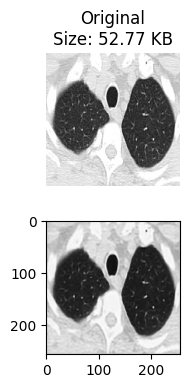

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

# Set the path to the folder containing CT scan images
folder_path = r"C:\Users\MAHESH\Desktop\NIT CALICUT INTERNSHIP\Dataset 3\covid"
image_size = (256, 256)

# Load and preprocess CT scan images
def load_images(folder_path, image_size):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = load_img(img_path, color_mode='grayscale', target_size=image_size)
        img_array = img_to_array(img) / 255.0  # Normalize pixel values
        images.append((img_array, os.path.getsize(img_path)))
    return images

ct_images = load_images(folder_path, image_size)

# Split the data into training and testing sets
train_images, test_images = train_test_split(ct_images, test_size=0.2, random_state=42)

# Define the autoencoder model
def build_autoencoder(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(inputs, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder

# Build and train the autoencoder
input_shape = (image_size[0], image_size[1], 1)
autoencoder = build_autoencoder(input_shape)

# Expand dimensions for model input
train_images_data, train_images_sizes = zip(*train_images)
test_images_data, test_images_sizes = zip(*test_images)
train_images_data = np.expand_dims(train_images_data, axis=-1)
test_images_data = np.expand_dims(test_images_data, axis=-1)

# Train the autoencoder
autoencoder.fit(train_images_data, train_images_data, epochs=10, batch_size=16, validation_data=(test_images_data, test_images_data))

# Generate compressed images
compressed_images = autoencoder.predict(test_images_data)

# Display the original and compressed images with sizes
plt.figure(figsize=(10, 4))

for i in range(5):
    # Original Image
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images_data[i, :, :, 0], cmap='gray')
    plt.title(f'Original\nSize: {test_images_sizes[i] / 1024.0:.2f} KB')
    plt.axis('off')

    # Compressed Image
    plt.subplot(2, 5, i + 6)
    plt.imshow(compressed_images[i, :, :, 0], cmap='gray')
    plt.title(f'Compressed\nSize: {os.path.getsizeof(compressed_images[i].tobytes()) / 1024.0:.2f} KB')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [4]:
import turtle

def draw_line(turtle, length, angle):
    turtle.forward(length)
    turtle.right(angle)

def draw_circle(turtle, radius):
    turtle.circle(radius)

def draw_rangoli(turtle, num_petals, petal_length):
    angle = 360 / num_petals

    for _ in range(num_petals):
        draw_line(turtle, petal_length, angle)
        draw_circle(turtle, petal_length / 2)
        draw_line(turtle, petal_length, angle)
        turtle.right(180)

def main():
    # Set up the turtle screen
    screen = turtle.Screen()
    screen.bgcolor("white")

    # Create a turtle object
    rangoli_turtle = turtle.Turtle()
    rangoli_turtle.speed(2)  # Set the drawing speed

    # Set parameters for rangoli
    num_petals = 8
    petal_length = 50

    # Move the turtle to the starting position
    rangoli_turtle.penup()
    rangoli_turtle.goto(-petal_length / 2, 0)
    rangoli_turtle.pendown()

    # Draw the rangoli
    draw_rangoli(rangoli_turtle, num_petals, petal_length)

    # Close the turtle graphics window when clicked
    turtle.exitonclick()

if __name__ == "__main__":
    main()


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
from keras.optimizers import Adam
from keras.preprocessing import image

# Generate random noise for the generator
def generate_noise(samples, latent_dim):
    return np.random.normal(0, 1, (samples, latent_dim))

# Generator model
def build_generator(latent_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(3, activation='tanh'))  # Output layer with 3 channels (RGB)
    model.add(Reshape((21, 21, 3)))
    return model

# Discriminator model
def build_discriminator(img_shape):
    model = Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))  # Output layer with binary classification
    return model

# Build and compile the GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze the weights of the discriminator during GAN training
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))
    return model

# Generate fake images with the generator
def generate_rangoli(generator, latent_dim, num_samples):
    noise = generate_noise(num_samples, latent_dim)
    generated_images = generator.predict(noise)
    generated_images = (generated_images + 1) / 2.0  # Rescale pixel values to the range [0, 1]
    return generated_images

# Train the GAN
def train_gan(generator, discriminator, gan, latent_dim, epochs, batch_size):
    for epoch in range(epochs):
        # Generate random noise as input to the generator
        noise = generate_noise(batch_size, latent_dim)
        
        # Generate fake images with the generator
        generated_images = generator.predict(noise)
        
        # Select a random batch of real images
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        real_images = x_train[idx]

        # Labels for real and fake images
        real_labels = np.ones((batch_size, 1))
        fake_labels = np.zeros((batch_size, 1))

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(generated_images, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator
        noise = generate_noise(batch_size, latent_dim)
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)

        # Print progress
        print(f"Epoch {epoch + 1}/{epochs}, [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")

# Load and preprocess the dataset (replace 'your_dataset.npy' with your dataset)
# The dataset should contain rangoli images in the shape (num_samples, 21, 21, 3)
# You may need to resize and preprocess your images accordingly.
# x_train = np.load('your_dataset.npy')

# Set hyperparameters
latent_dim = 100
img_shape = (21, 21, 3)
epochs = 20000
batch_size = 64

# Build and compile the discriminator
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# Build and compile the generator
generator = build_generator(latent_dim)

# Build and compile the GAN
gan = build_gan(generator, discriminator)

# Train the GAN
train_gan(generator, discriminator, gan, latent_dim, epochs, batch_size)

# Generate and save a sample of rangoli images
num_generated_samples = 16
generated_rangoli = generate_rangoli(generator, latent_dim, num_generated_samples)

# Display the generated images
fig, axs = plt.subplots(4, 4, figsize=(4, 4))
cnt = 0
for i in range(4):
    for j in range(4):
        axs[i,j].imshow(generated_rangoli[cnt, :, :, :])
        axs[i,j].axis('off')
        cnt += 1
plt.show()


ValueError: Exception encountered when calling layer "reshape" (type Reshape).

total size of new array must be unchanged, input_shape = [3], output_shape = [21, 21, 3]

Call arguments received by layer "reshape" (type Reshape):
  • inputs=tf.Tensor(shape=(None, 3), dtype=float32)